## S&P Global - Well Logs 
### Misael M. Morales

In [1]:
from utils import *

DF Columns: ['UWI' 'Surface X' 'Surface Y' 'SurfLat' 'SurfLong' 'BH X' 'BH Y'
 'BHLatDec' 'BHLongDec' 'Start Depth' 'End Depth' 'Interval Name'
 'SN_FORMSAND' 'SAND_NAME' 'ASSESSED' 'SDDATE' 'SDYEAR' 'SDDATEH'
 'SDYEARH' 'API_WELL_NUMBER_SHT' 'WB' 'BOEM_FIELD' 'FCLASS' 'FSTAT'
 'FSTRUC' 'FTRAP1' 'FTRAP2' 'FDDATE' 'FDYEAR' 'EIAID' 'PLAREA' 'SAND'
 'PLAY_NUM' 'PLAY_NAME' 'POOL_NAME' 'CHRONOZONE' 'PLAY_TYPE' 'SD_TYPE'
 'WDEP' 'Original Oil' 'Original Gas' 'Original BOE' 'Cum Oil' 'Cum Gas'
 'Cum BOE' 'Oil Reserves' 'Gas Reserves' 'BOE Reserves' 'SS' 'THK' 'TAREA'
 'TVOL' 'OTHK' 'OAREA' 'OVOL' 'GTHK' 'GAREA' 'GVOL' 'DRIVE' 'RESTYP'
 'POROSITY' 'SW' 'PERMEABILITY' 'Pi' 'TI' 'SDPG' 'SDTG' 'RSI' 'YIELD'
 'PROP' 'GOR' 'SPGR' 'API' 'BGI' 'BOI' 'RECO_AF' 'RECG_AF' 'OIP' 'GIP'
 'ORF' 'ORECO' 'ORECG' 'ORP' 'GRF' 'GRECO' 'GRECG' 'GRP' 'NCNT' 'UCNT'
 'SCNT' 'TCNT' 'BHCOMP' 'LAT' 'LONG']


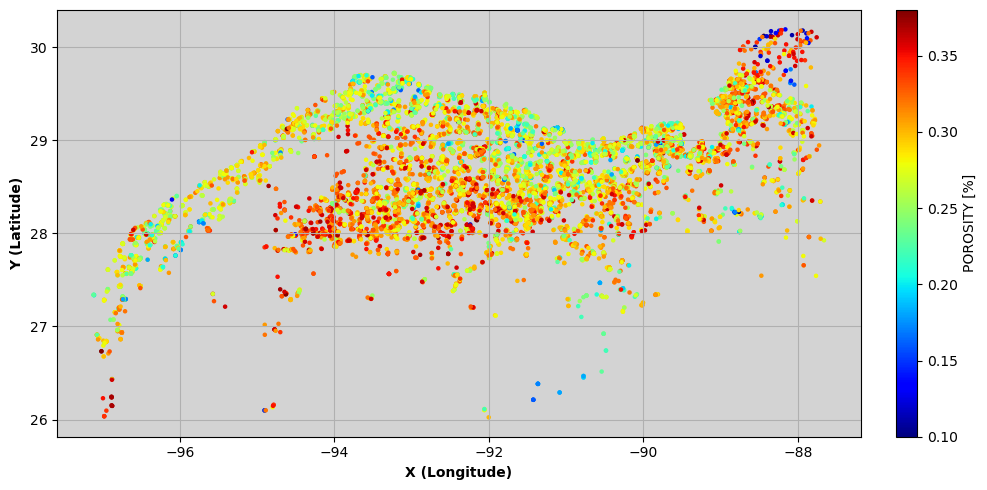

In [29]:
df = pd.read_csv('Data/CCS_Sand_wells1.csv')
print('DF Columns:', df.columns.values)
plt.figure(figsize=(10, 5))
plt.scatter(df['LONG'], df['LAT'], s=5, c=df['POROSITY'], cmap='jet')
plt.xlabel('X (Longitude)', weight='bold'); plt.ylabel('Y (Latitude)', weight='bold')
plt.colorbar(pad=0.04, fraction=0.046, label='POROSITY [%]')
plt.gca().set_facecolor('lightgray')
plt.grid(True, which='both'); plt.tight_layout(); plt.show()

DF Columns: ['MD(FT)' 'TVD(FT)' 'AZ(DEG)' 'INC(DEG)' 'X(FT)' 'Y(FT)']


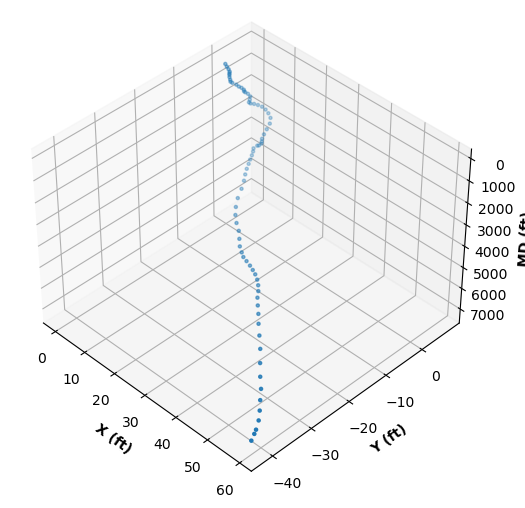

In [40]:
survey = pd.read_csv('Data/UT dir surveys/427064023000_DIRSUR_NAD27(USFEET)US-SPC27-EXACT(TX-27SC).TXT',skiprows=3, sep='\s+')
print('DF Columns:', survey.columns.values)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d', elev=40, azim=-45)
ax.scatter(survey['X(FT)'], survey['Y(FT)'], survey['MD(FT)'], s=5)
ax.set_xlabel('X (ft)', weight='bold'); ax.set_ylabel('Y (ft)', weight='bold'); ax.set_zlabel('MD (ft)', weight='bold')
ax.invert_zaxis()
plt.tight_layout(); plt.show()

dict_keys(['DEPT', 'ASN', 'CALI', 'DRHO', 'DT', 'GR', 'GR_NORM', 'ILD', 'RHOB', 'SP', 'SP_NORM', 'VSH_GR', 'VSH_SP'])


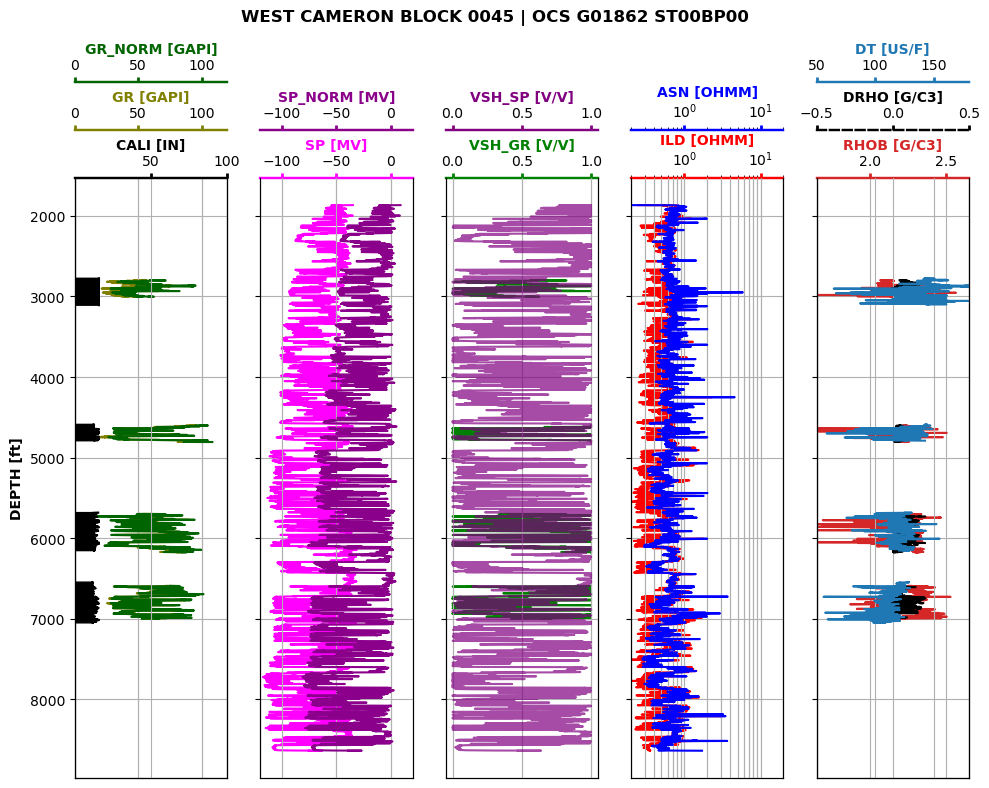

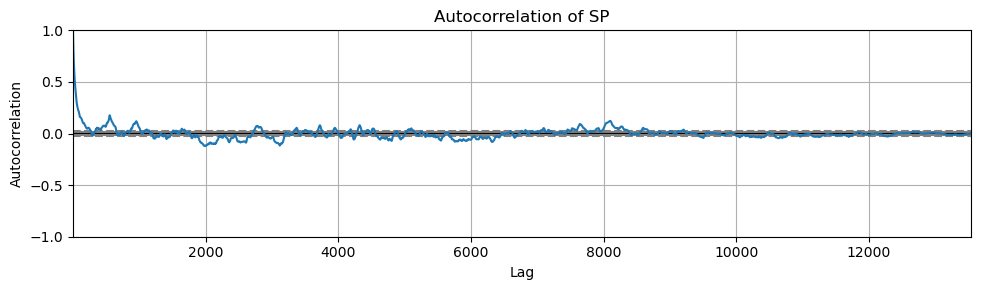

In [79]:
well_name = '17700004060000'
well_log = lasio.read('Data/UT Export 9-19/{}.las'.format(well_name))
well_name, well_field = well_log.header['Well']['WELL'].value, well_log.header['Well']['FLD'].value
print(well_log.curvesdict.keys())


fig, axs = plt.subplots(1, 5, figsize=(10, 8), sharey=True)
fig.suptitle('{} | {}'.format(well_field, well_name), weight='bold')
ax1, ax2, ax3, ax4, ax5 = axs.flatten()

ax11, ax12 = ax1.twiny(), ax1.twiny()
plot_curve(ax12, well_log, 'CALI', 0.1, 100, color='k', fill=True)
plot_curve(ax1, well_log, 'GR', 0, 120, color='olive', pad=1.08)
plot_curve(ax11, well_log, 'GR_NORM', 0, 120, color='darkgreen', pad=1.16)

ax21 = ax2.twiny()
plot_curve(ax2, well_log, 'SP', -120, 20, color='magenta')
plot_curve(ax21, well_log, 'SP_NORM', -120, 20, color='darkmagenta', pad=1.08)

ax31 = ax3.twiny()
plot_curve(ax3, well_log, 'VSH_GR', -0.05, 1.05, color='green')
plot_curve(ax31, well_log, 'VSH_SP', -0.05, 1.05, color='purple', alpha=0.7, pad=1.08)

ax41 = ax4.twiny()
plot_curve(ax4, well_log, 'ILD', 0.2, 20, color='r', semilog=True)
plot_curve(ax41, well_log, 'ASN', 0.2, 20, color='b', semilog=True, pad=1.08)

ax51, ax52 = ax5.twiny(), ax5.twiny()
plot_curve(ax5, well_log, 'RHOB', 1.65, 2.65, color='tab:red')
plot_curve(ax51, well_log, 'DRHO', -0.5, 0.5, color='k', linestyle='--', pad=1.08)
plot_curve(ax52, well_log, 'DT', 50, 180, color='tab:blue', pad=1.16)

ax1.set_ylabel('DEPTH [ft]', weight='bold')
plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,3))
pd.plotting.autocorrelation_plot(well_log['SP'])
plt.title('Autocorrelation of SP')
plt.tight_layout(); plt.show()

In [89]:
model = ARIMA(well_log['SP'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                13543
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -28290.555
Date:                Wed, 29 Nov 2023   AIC                          56593.109
Time:                        20:20:49   BIC                          56638.190
Sample:                             0   HQIC                         56608.142
                              - 13543                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1084      0.004    314.001      0.000       1.101       1.115
ar.L2         -0.5243      0.006    -84.417      0.000      -0.536      -0.512
ar.L3          0.1098      0.008     14.372      0.0

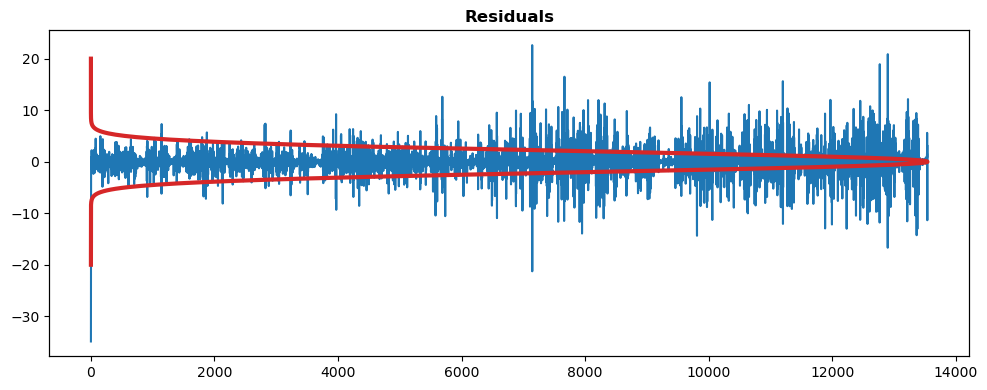

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))

mu, std = stats.norm.fit(model_fit.resid)
x = np.linspace(-20, 20, 500)
p = stats.norm.pdf(x, mu ,std)

ax2 = ax.twiny()
ax.plot(model_fit.resid, c='tab:blue', label='Residuals')
ax2.plot(p,x, c='tab:red', linewidth=3, label='PDF')
ax2.set_xticks([])

plt.title('Residuals', weight='bold')
plt.tight_layout(); plt.show()

In [143]:
logs_list = {}
for i, file in enumerate(os.listdir('Data/UT Export 9-19/')):
    log = lasio.read('Data/UT Export 9-19/{}'.format(file))
    if 'SP' in log.curvesdict.keys():
        logs_list[i] = pd.DataFrame({'DEPT':log['DEPT'], 'SP':log['SP'], 'SP_NORM':log['SP_NORM']})

***
# END